In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
import numpy as np
import pandas as pd
import json
import os
from cassandra.cluster import Cluster
from cassandra import util
from stldecompose import decompose, forecast

In [48]:
cluster = Cluster()
session = cluster.connect('db_tsa')

rows = session.execute("SELECT name, dateof(event_time) AS event_time FROM time_series where name='movi'")
seriesdates = [item[1] for item in rows]

In [49]:
main_ts = pd.Series(1, index = seriesdates)

In [50]:
main_resampled = main_ts.resample('30Min').sum()
main_resampled.head(5)

2017-10-01 06:00:00    159
2017-10-01 06:30:00    102
2017-10-01 07:00:00     77
2017-10-01 07:30:00     52
2017-10-01 08:00:00     48
Freq: 30T, dtype: int64

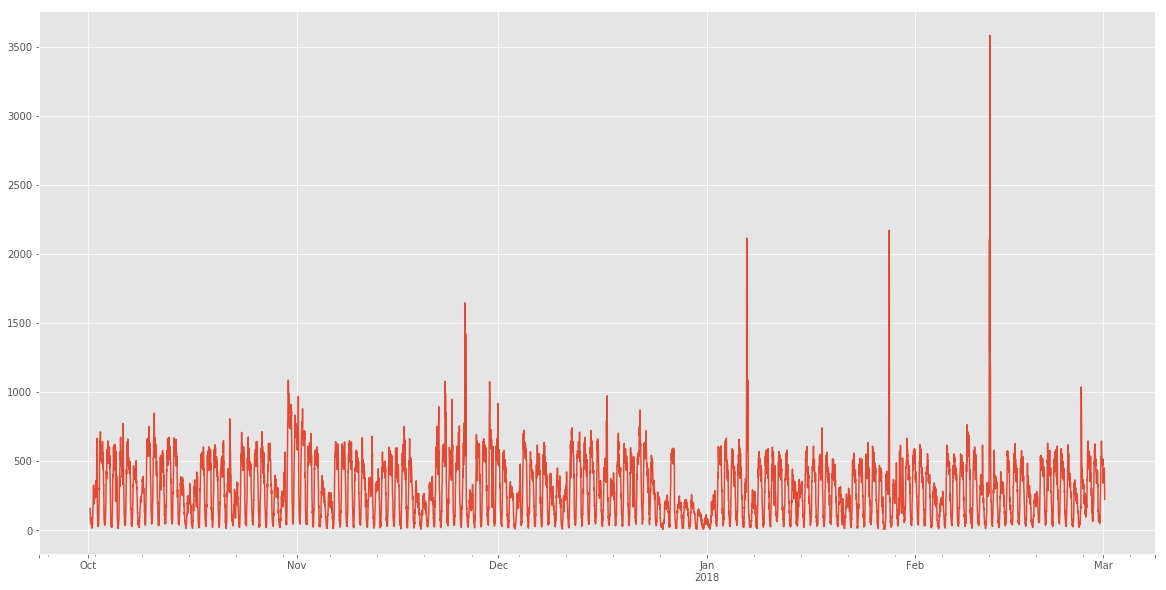

In [51]:
main_resampled.plot();

In [52]:
#firstpair = {k: series[k] for k in list(series)[:2]}
#print(firstpair)
#resampleo de ejemplo la serie del tag sa_negativo (nota, se pasa float, resolver)
tagseries = pd.Series(1, index = series['ImagenInstitucional_neg'])
tagseries_resample = tagseries.resample('30Min').sum()

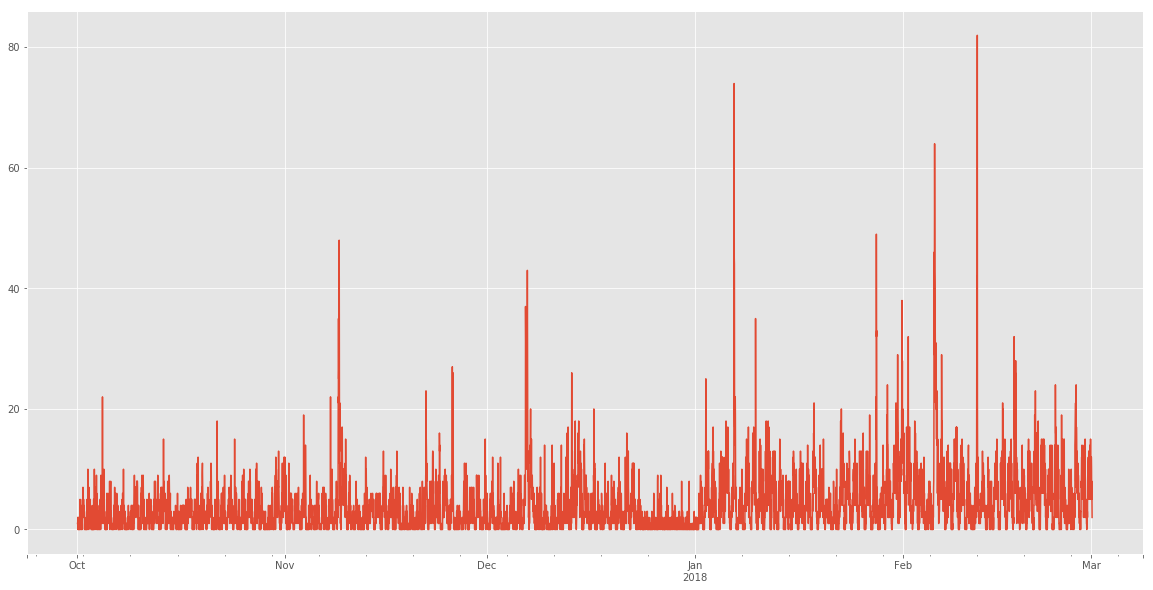

In [53]:
tagseries_resample.plot()

In [54]:
tagseries_resample.corr(main_resampled, method='pearson')

0.3044823636964283

In [55]:
tagseries_resample.corr(main_resampled, method='kendall')

0.2998299139494649

In [56]:
tagseries_resample.corr(main_resampled, method='spearman')

0.4250642306814675

In [57]:
tagsizes = []
for k,v in series.items():
    pair = [len(v), k]
    tagsizes.append(pair)
sorted(tagsizes, reverse=True)

[[474318, 'sa_Neutro'],
 [361355, 'sa_Negativo'],
 [227972, 'sa_Positivo'],
 [210678, 'Whitelist'],
 [103533, 'DatosPersonales_Telefono_neu'],
 [91966, 'Engagement_pos'],
 [73997, 'EstadoDelCaso_DesarrolloDelCaso_neu'],
 [69370, 'Engagement_neu'],
 [59490, 'DatosPersonales_Geolocalizacion_neu'],
 [49098, 'LenguajeInapropiado'],
 [38180, 'MKT_Promocion_neu'],
 [32386, 'Engagement_RespuestasAConsignas_pos'],
 [29372, 'ImagenInstitucional_neg'],
 [23858, 'Red_Senial_neg'],
 [19428, 'ImagenInstitucional_Credibilidad_AcusacionEstafa_neg'],
 [19125, 'DatosPersonales_DNI_neu'],
 [18201, 'DatosPersonales_neu'],
 [16460, 'MKT_Eventos_pos'],
 [16435, 'OffTopic'],
 [15712, 'MKT_Eventos_neu'],
 [15386, 'EstadoDelCaso_SolicitudDeAsistencia_cons'],
 [14790, 'Servicio_Senial_neg'],
 [14444, 'Engagement_LlamadoAOtroUsuario'],
 [12856, 'Fidelizacion_Detractor_neg'],
 [12737, 'Red_Internet_neg'],
 [12719, 'EstadoDelCaso_SolicitudDeAsistencia_pet'],
 [11917, 'Venta_neu'],
 [11683, 'Atencion_Respuesta_Res

In [58]:
#stl decomposition
stl = decompose(tagseries_resample, period=336)

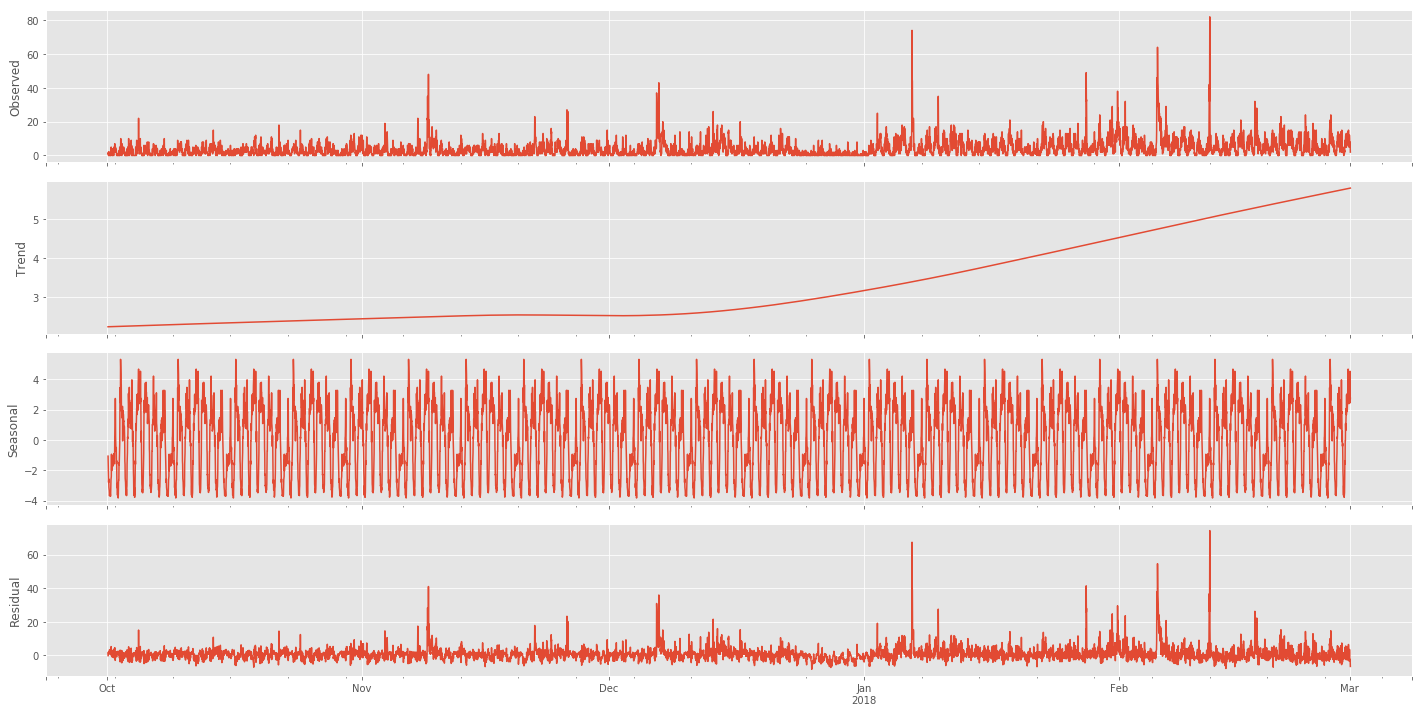

In [59]:
stl.plot();
#para obtener componentes individuales stl.observed/resid/trend/seasonal

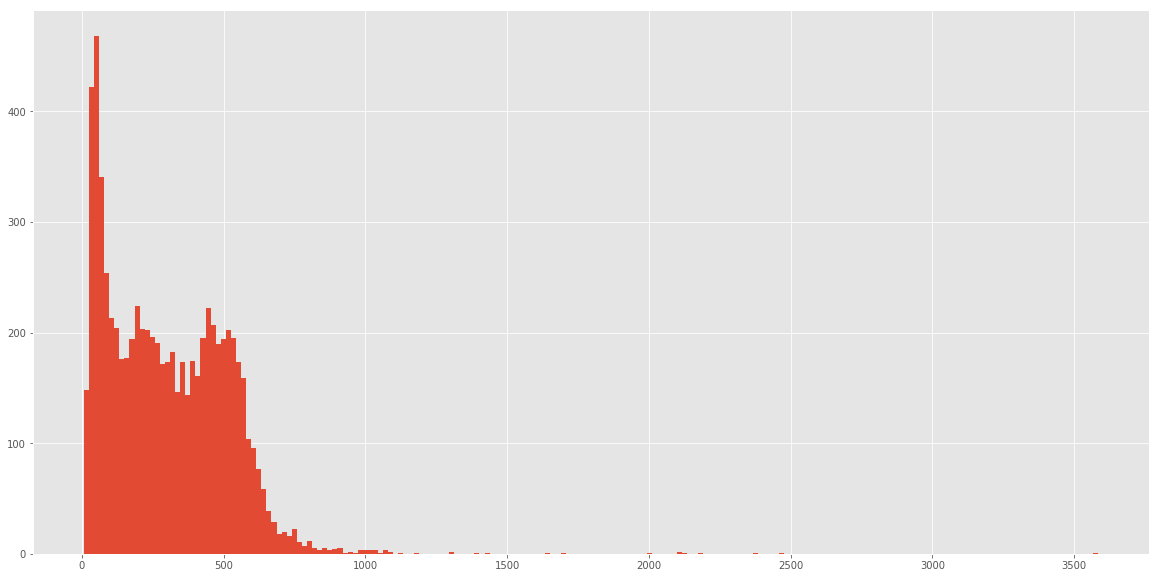

In [60]:
main_resampled.hist(bins=200)

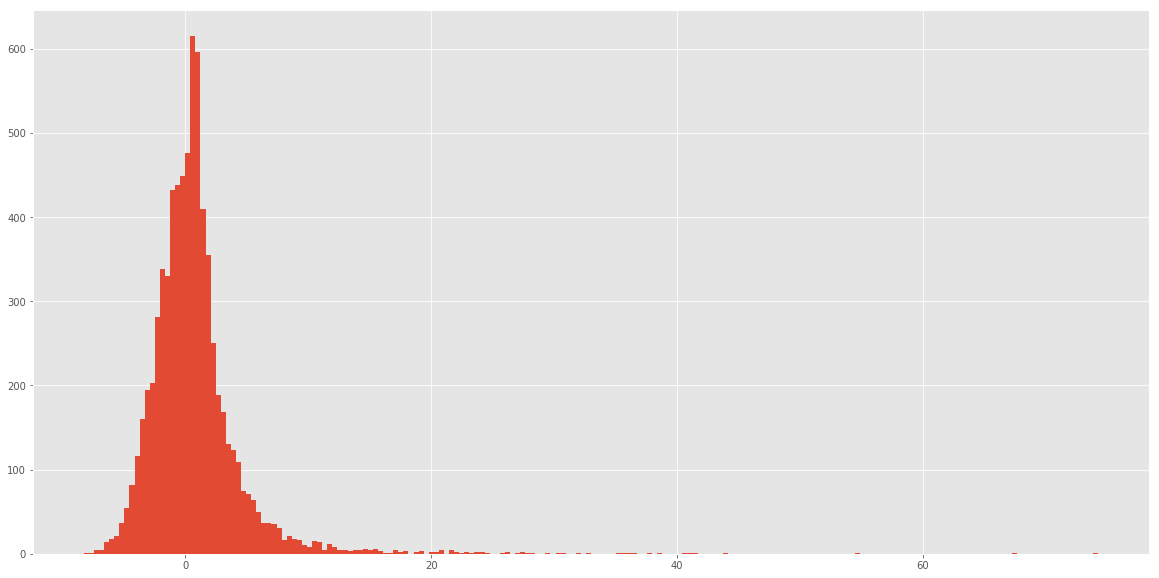

In [61]:
stl.resid.hist(bins=200)